In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# classifiers we will use
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
from plotting import plot_learning_curve, plot_validation_curve

#dataset
from sklearn.datasets import load_digits


In [2]:
data = load_digits()
data.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(sum(data.target==2))

177


In [4]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
X = data.data # data is the flattened version of the images
y = data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=2022)                 

In [7]:
clf=RandomForestClassifier(random_state=2022)

In [8]:
scores = cross_val_score(clf,X,y,scoring='f1_macro',cv=StratifiedKFold(n_splits=3)  )

In [9]:
print(scores.mean())

0.9396488401195245


In [10]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2022), random_state=2022)

In [11]:
param_grid = {'base_estimator__max_depth':[2,10,20], 'base_estimator__min_samples_leaf':[2,10,20]}

In [12]:
grid = GridSearchCV(ada, param_grid, cv=3)

In [13]:
grid.fit(X_train,y_train)

/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2022),
                                          random_state=2022),
             param_grid={'base_estimator__max_depth': [2, 10, 20],
                         'base_estimator__min_samples_leaf': [2, 10, 20]})

In [14]:
grid.best_params_

{'base_estimator__max_depth': 20, 'base_estimator__min_samples_leaf': 2}

/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/akshaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


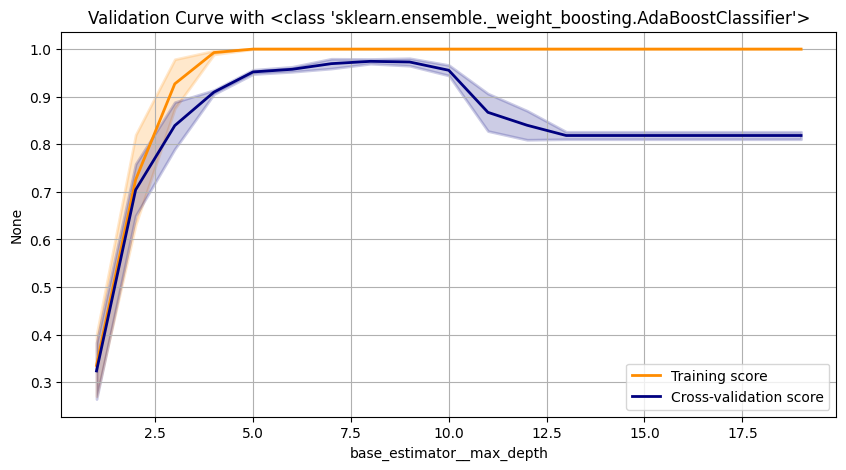

In [15]:
fig = plot_validation_curve(ada, X_train, y_train, cv=3, param_name='base_estimator__max_depth', param_range=np.arange(1,20))

In [16]:
print(data.images[0])


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


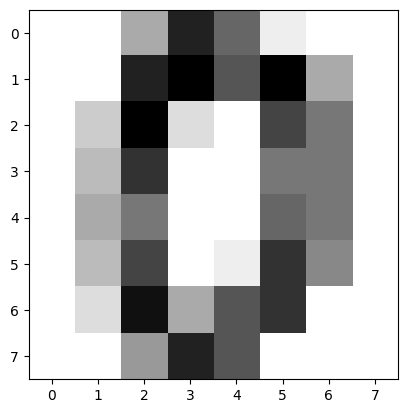

In [17]:
plt.imshow(data.images[0], cmap='binary', interpolation='nearest');


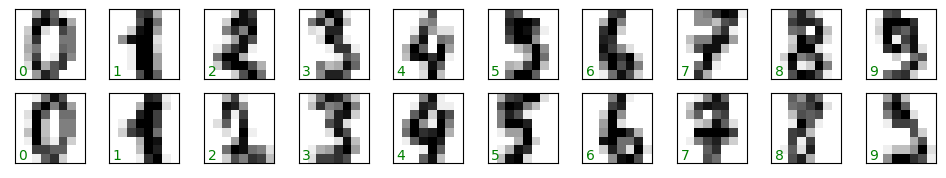

In [18]:
fig, axes = plt.subplots(2, 10, figsize=(12, 2))

for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(data.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [19]:
np.isnan(X).sum()

0

In [20]:
print(type(X))


<class 'numpy.ndarray'>


In [21]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=1)

In [22]:

my_decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)
adb=AdaBoostClassifier(my_decision_tree, n_estimators=100,learning_rate=1,random_state=1)
adb_m=adb.fit(X_train,y_train)

In [23]:
y_pred=adb_m.predict(X_val)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred)

0.9866666666666667

In [25]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_preds=rfc.predict(X_val)

In [27]:
accuracy_score(y_val,y_preds)

0.98